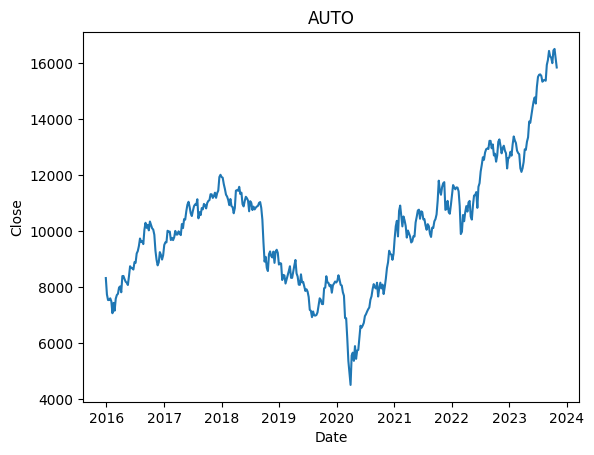

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_auto = pd.read_excel("D:/IT/dav/Stocks_Data.xlsx",sheet_name="auto_cnx")
plt.plot(df_auto['Date'],df_auto['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("AUTO")
plt.show()

          Date         Open         High          Low        Close  \
215 2020-02-10  8065.399902  8067.350098  7807.299805  7822.200195   
216 2020-02-17  7833.149902  7833.600098  7606.250000  7697.899902   
217 2020-02-24  7644.049805  7644.049805  6883.350098  6903.950195   
218 2020-03-02  6993.200195  7047.600098  6661.950195  6895.000000   
219 2020-03-09  6703.450195  6758.700195  5265.799805  6182.000000   

       Adj Close   Volume  
215  7822.200195  4599900  
216  7697.899902  3828200  
217  6903.950195  6402300  
218  6895.000000  8190100  
219  6182.000000  7915700  
Percentage change:  -42.244510657145106


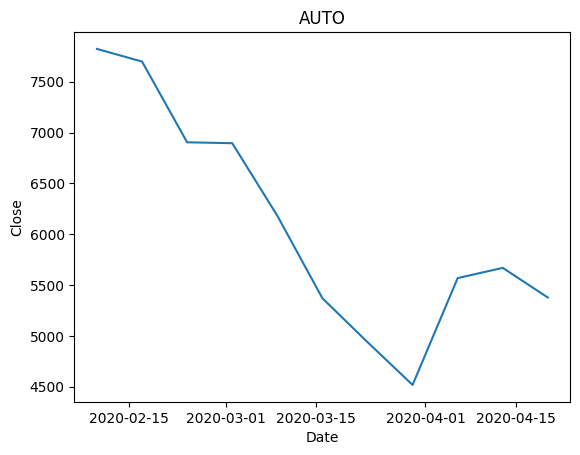

In [2]:
covid_period = df_auto[(df_auto['Date'] >= '2020-02-10') & (df_auto['Date'] <= '2020-04-20')]
print(covid_period.head())
change = ((covid_period['Close'].min()-covid_period['Close'].max())/covid_period['Close'].max())*100
print("Percentage change: ",change)
plt.plot(covid_period['Date'],covid_period['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("AUTO")
plt.show()

          Date  Adj Close  percent_change
158 2019-07-01   82.10702       -2.582644
159 2019-01-14   80.36562       -2.120891
160 2019-01-21   71.91982      -10.509220
161 2019-01-28   72.74699        1.150128
162 2019-04-02   75.79443        4.189094
          Date    Adj Close  percent_change
157 2019-01-07  10794.95020        0.630170
158 2019-01-14  10906.95020        1.037522
159 2019-01-21  10780.54980       -1.158898
160 2019-01-28  10893.65039        1.049117
161 2019-02-04  10943.59961        0.458517
[0.20680025768908938, 0.30580733069695243, 0.2677501225713773, 0.2948153394901768]


C:\Users\Yash\AppData\Local\Temp\ipykernel_16996\1776009561.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_asl_reg['Date'] = pd.to_datetime(df_asl_reg['Date'])


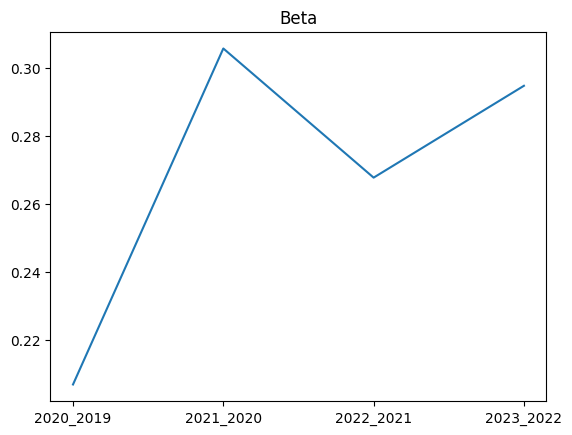

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_asl_reg = pd.read_excel("D:/IT/dav/Stocks_Data.xlsx",sheet_name="ASHOK")
df_asl_beta = []
df_asl_reg['Date'] = pd.to_datetime(df_asl_reg['Date'])
df_dates = ['2020_2019','2021_2020','2022_2021','2023_2022']
df_asl_2020_2019 = df_asl_reg[(df_asl_reg['Date'] >= '2019-01-01') & (df_asl_reg['Date'] <= '2020-01-01')]
df_asl_2021_2020 = df_asl_reg[(df_asl_reg['Date'] >= '2020-01-01') & (df_asl_reg['Date'] <= '2021-01-01')]
df_asl_2022_2021 = df_asl_reg[(df_asl_reg['Date'] >= '2021-01-01') & (df_asl_reg['Date'] <= '2022-01-01')]
df_asl_2023_2022 = df_asl_reg[(df_asl_reg['Date'] >= '2022-01-01') & (df_asl_reg['Date'] <= '2023-01-01')]
print(df_asl_2020_2019.head())

df_nifty50 = pd.read_excel("D:/IT/dav/stocks.xlsx")
df_nifty50_2020_2019 = df_nifty50[(df_nifty50['Date'] >= '2019-01-01') & (df_nifty50['Date'] <= '2020-01-01')]
df_nifty50_2021_2020 = df_nifty50[(df_nifty50['Date'] >= '2020-01-01') & (df_nifty50['Date'] <= '2021-01-01')]
df_nifty50_2022_2021 = df_nifty50[(df_nifty50['Date'] >= '2021-01-01') & (df_nifty50['Date'] <= '2022-01-01')]
df_nifty50_2023_2022 = df_nifty50[(df_nifty50['Date'] >= '2022-01-01') & (df_nifty50['Date'] <= '2023-01-01')]
print(df_nifty50_2020_2019.head())

model = LinearRegression()
model.fit(df_asl_2020_2019[['percent_change']], df_nifty50_2020_2019['percent_change'])
c1 = model.coef_[0]
df_asl_beta.append(c1)

model.fit(df_asl_2021_2020[['percent_change']], df_nifty50_2021_2020['percent_change'])
c2 = model.coef_[0]
df_asl_beta.append(c2)

model.fit(df_asl_2022_2021[['percent_change']], df_nifty50_2022_2021['percent_change'])
c3 = model.coef_[0]
df_asl_beta.append(c3)

model.fit(df_asl_2023_2022[['percent_change']], df_nifty50_2023_2022['percent_change'])
c4 = model.coef_[0]
df_asl_beta.append(c4)

# Fit the model to the data
print(df_asl_beta)
plt.plot(df_dates,df_asl_beta)
plt.title("Beta")
plt.show()


In [6]:
import matplotlib.pyplot as plt
first = df_auto.head(1)['Adj Close'][0]
second = df_auto.tail(1)['Adj Close'][409]
print(first,second)
change = ((second-first)/first)*100
print("Percentage change: ",change)

8328.299805 15835.65039
Percentage change:  90.14265529313519


In [7]:
print("Correlation: ",df_auto['Adj Close'].corr(df_auto['Volume']))

Correlation:  0.0692818553177437


[None, None, None, None, None, None, None, None, None]

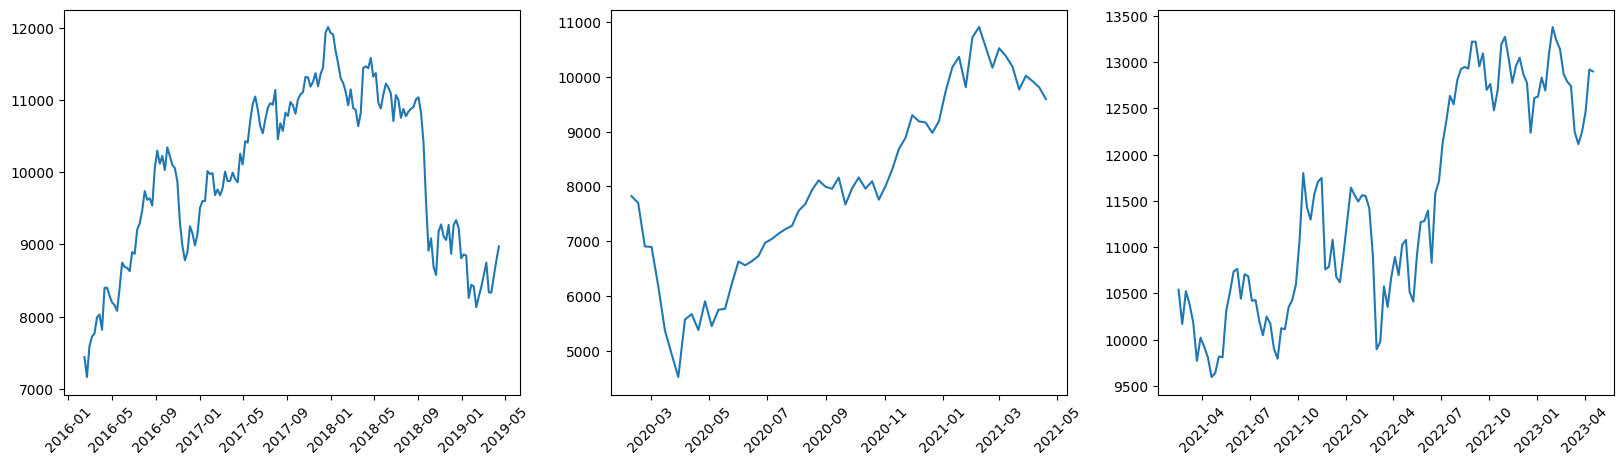

In [8]:
import matplotlib.pyplot as plt
pre_covid_period = df_auto[(df_auto['Date'] >= '2016-02-10') & (df_auto['Date'] <= '2019-04-20')]
covid_period = df_auto[(df_auto['Date'] >= '2020-02-10') & (df_auto['Date'] <= '2021-04-20')]
post_covid_period = df_auto[(df_auto['Date'] >= '2021-02-10') & (df_auto['Date'] <= '2023-04-20')]
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.plot(pre_covid_period['Date'],pre_covid_period['Close'])
ax2.plot(covid_period['Date'],covid_period['Close'])
ax3.plot(post_covid_period['Date'],post_covid_period['Close'])
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

In [9]:
post_covid_period = df_auto[(df_auto['Date'] >= '2021-01-01') & (df_auto['Date'] <= '2023-01-01')]
change = ((post_covid_period['Adj Close'].max()-covid_period['Adj Close'].min())/covid_period['Adj Close'].min())*100
print(change)

193.7679198716175


12.274096137559356


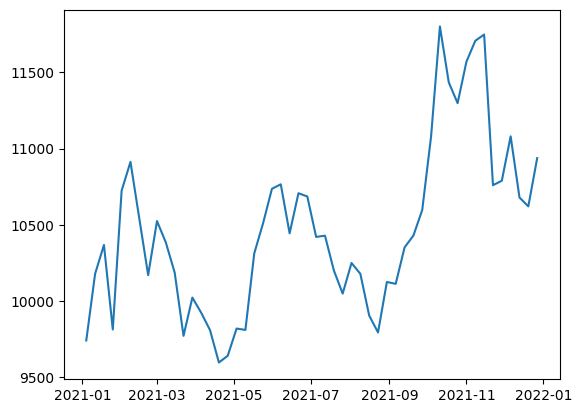

In [4]:
import matplotlib.pyplot as plt
df_auto_2022_2021 = df_auto[(df_auto['Date'] >= '2021-01-01') & (df_auto['Date'] <= '2022-01-01')]
first = df_auto_2022_2021.head(1)['Adj Close'][262]
second = df_auto_2022_2021.tail(1)['Adj Close'][313]
change = ((second-first)/first)*100
print(change)
plt.plot(df_auto_2022_2021['Date'],df_auto_2022_2021['Adj Close'])